#  COUNTERFEIT NOTES DETECTION PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import stats,shapiro,normaltest,t
from statistics import mean

#### Data import (this is a fictive dataset made just for this project)

In [142]:
notes=pd.read_csv('billets.txt',sep=";")

In [143]:
notes 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


### First let's observe our quantitative variables

In [144]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [145]:
notes.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

##### We have 37 missing values for the variable margin_low

#### Let's retrieve them with a linear regression

### Linear regression

First we only select the rows without nulls

In [146]:
notes_copy=notes.dropna()

Let's see the correlations with our dependant variable "margin_low" and the other variables (with their p-values)

In [147]:
from scipy.stats.stats import pearsonr

In [148]:
def corr_list(data):
    corr=list()
    for i in range(data.shape[1]-1):
        x_ind=data.iloc[:,i+1]
        x_dep=data["margin_low"]
        cor,pv=pearsonr(x_ind,x_dep)
        corr.append([cor,pv])
    index=data.columns[1:]
    corr=pd.DataFrame(corr,index=index,columns=['correlations','pvalues'])
    return corr

In [149]:
corr_list(notes_copy)

,correlations,pvalues
diagonal,-0.111534,1.904626e-05
height_left,0.302643,2.289195e-32
height_right,0.391085,1.159047e-54
margin_low,1.000000,0.000000e+00
margin_up,0.431606,1.921604e-67
length,-0.666753,8.975567e-189


The highest correlation is for the variable "length" with a correlaion -0.66 and then the variable "margin_up" with 0.43 correlation

#### Let's see now the coefficient of determination R² for each variable

In [150]:
#Instanciation de l'oblet LinearRegression
model_linear=LinearRegression()

In [151]:
#Calcul du coeficient de determination pour chaque variables explicatives
def det_list(model,datas):
    det=list()
    for i in range(datas.shape[1]-1):
            x=datas.iloc[:,i+1].values.reshape((-1,1))
            y=datas["margin_low"]
            model.fit(x,y)
            det.append(model.score(x,y))
    index=datas.columns[1:]
    det=pd.DataFrame(det,index=index,columns=['coef_determination(R²)'])
    return det

In [152]:
det_list(model_linear,notes_copy)

,coef_determination(R²)
diagonal,0.012440
height_left,0.091593
height_right,0.152948
margin_low,1.000000
margin_up,0.186284
length,0.444559


The variable "length" represent the highest variance explained with 44,4% .

#### Let's check now the distribution of the residuals 

In [153]:
#Function for the residuals
def res(model,x_exp,y_dep):
    #equation de la droite
    a=model.coef_
    b=model.intercept_
    r=list()
    
    for idx,x in x_exp.iteritems():
        r.append((y_dep[idx]-(a*x+b)))
    r=pd.DataFrame(r,columns=['Residuals'])
    return r

In [154]:
list_residuals=res(model_linear,notes_copy["length"],notes_copy["margin_low"])

C:\Users\phild\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


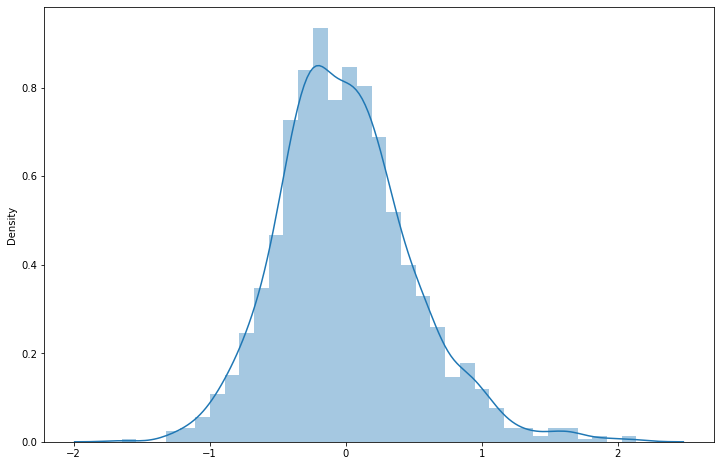

In [155]:
#Plot
plt.figure(figsize=(12,8))
sns.distplot(list_residuals,hist=True)
plt.show()

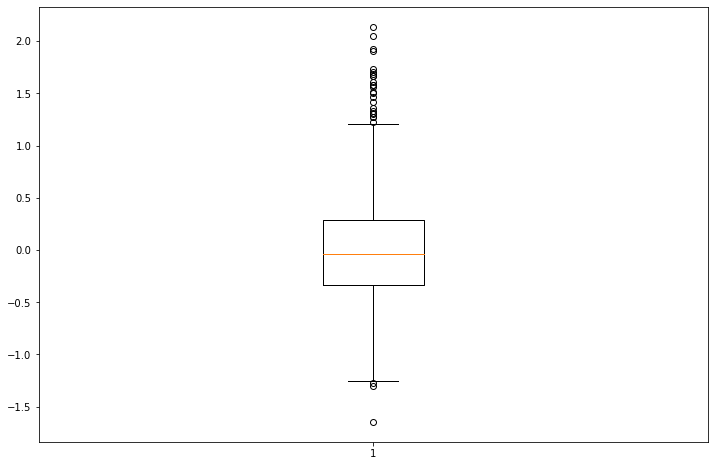

In [156]:
#box plot
plt.figure(figsize=(12,8))
plt.boxplot(list_residuals)
plt.show()

The distributions is a bit skewed on the left. Let's perform a normality check

#### Normality test

In [157]:
shapiro(list_residuals)

ShapiroResult(statistic=0.9824789762496948, pvalue=2.3925759377180222e-12)

In [158]:
normaltest(list_residuals)

NormaltestResult(statistic=array([95.15576063]), pvalue=array([2.17364751e-21]))

The 2 tests performed with p-values below 0.05 indicate that we can reject the null hypothesis and state that the residuals does not follow a normal distribution

#### Let's use a model that can handle non-normally distributed

In [159]:
from sklearn.linear_model import RANSACRegressor

In [160]:
model_robust = RANSACRegressor()

In [161]:
model_robust.fit(notes_copy.length.values.reshape((-1,1)), notes_copy.margin_low)

RANSACRegressor()

#### Let's check the homoscedasticity

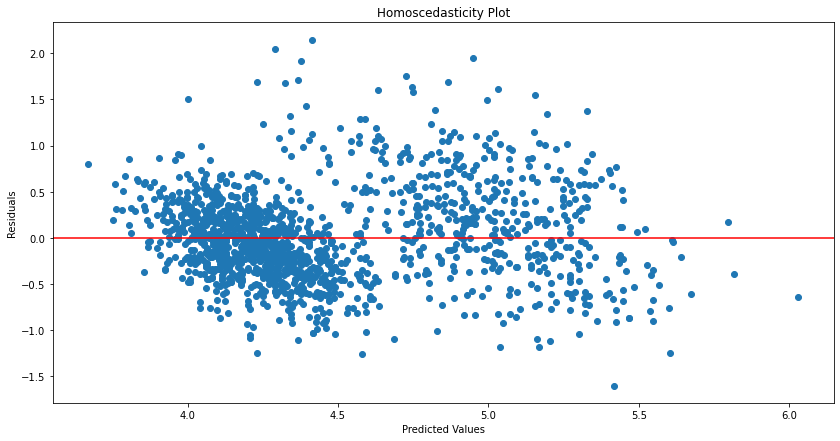

In [162]:
y_pred = model_robust.predict(notes_copy.length.values.reshape((-1,1)))
residuals = notes_copy.margin_low - y_pred

# plot residuals vs predicted values
fig = plt.figure(figsize=(14, 7))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Homoscedasticity Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Even if the residuals are not perfectly distributed along the line, I decide to continue with this model.

### Let's check now if the estimate coefficient is significant

In [163]:
coef=model_robust.estimator_.coef_

In [164]:
#Standard error of residuals:
sum_res=0
for x in residuals:
    sum_res=sum_res+(x)**2
std_err_res=np.sqrt(sum_res/(len(notes_copy.length)-2))

# Calculate the standard error of the coefficients    
sum_x=0
for x in notes_copy.length:
    sum_x=sum_x+(x-mean(notes_copy.length))**2

std_err_slope=std_err_res/np.sqrt(sum_x)


In [165]:
# Ttest
#H0 The coefficient of the regression line is not significant
#H1 The coefficient of the regression line is significant

a=coef
a0=0

t_stat=float((a-a0)/std_err_slope)
p_val=t.sf(abs(t_stat),df=len(notes_copy.length-2))
result=pd.DataFrame([t_stat,p_val],index=['T stat','P value'],columns=['Result'])
result

,Result
T stat,-3.295192e+01
P value,6.936047e-179


#### The pvalue being largly inferior to 0.05, we can reject Ho and admit that the coefficient of the slope is significant

#### Let's plot the regression line

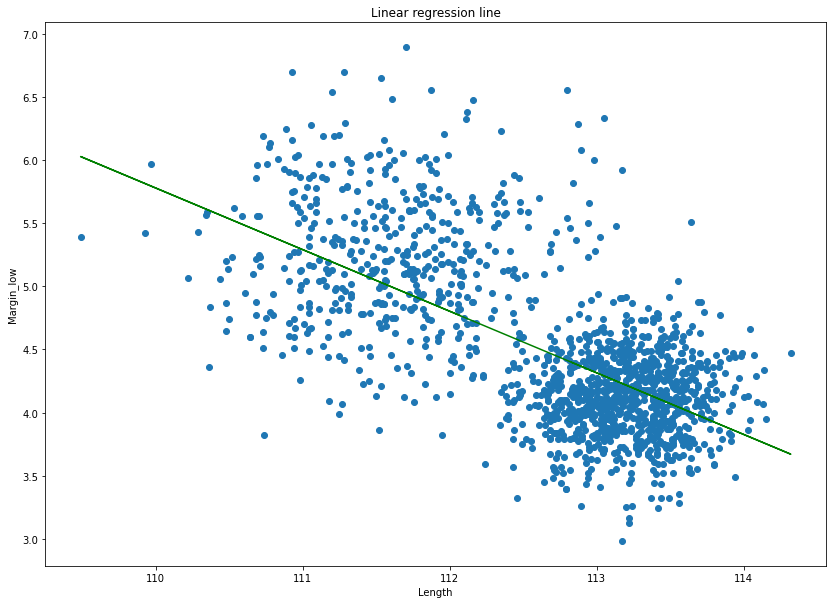

In [166]:
#equation de la droite
a=model_robust.estimator_.coef_
b=model_robust.estimator_.intercept_
x=notes_copy["length"]
y_model=a*x + b


#Affichage
plt.figure(figsize=(14,10))
plt.plot(x,y_model,color="g")
plt.scatter(notes_copy.length,notes_copy.margin_low)
plt.title("Linear regression line")
plt.xlabel("Length")
plt.ylabel('Margin_low')
plt.show()

#### Let's predict now the missing values

In [168]:
#storing the corresponding "length" values
x_length=notes[notes['margin_low'].isnull()].length

In [169]:
#Prediction of the missing values
y_pred = model_linear.predict(x_length.values.reshape((-1,1)))

In [170]:
y_pred

array([4.42755559, 4.28056693, 4.35659555, 4.18426401, 4.6455043 ,
       4.20960688, 4.17412686, 4.13864684, 4.3464584 , 4.3464584 ,
       4.33632125, 3.81932664, 3.99165818, 4.40221272, 4.42755559,
       4.18426401, 4.49851564, 4.62016143, 4.2856355 , 4.11330397,
       3.59124078, 4.14371541, 4.0068639 , 4.18426401, 3.90549241,
       3.97645245, 4.43262417, 4.48330991, 4.13357827, 4.89386446,
       4.63029858, 5.18784178, 5.22839038, 4.68098432, 5.6845621 ,
       5.09660744, 5.08647029])

#### Replacing the missing values by the predicted ones

In [171]:
#First getting the corresponding indexes
index_na=notes[notes["margin_low"].isnull()].index

In [172]:
index_na

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')

In [173]:
#Loop for replacing
j=0
for i in index_na:
    notes.loc[i,"margin_low"]=y_pred[j]
    j=j+1

In [174]:
#Checking
for i in index_na:
    print(notes.loc[i,"margin_low"])

4.427555592663467
4.280566928958422
4.3565955481162035
4.1842640113585645
4.645504300915775
4.2096068844111585
4.17412686213752
4.138646839863895
4.346458398895166
4.346458398895166
4.336321249674128
3.8193266394012113
3.991658176158843
4.402212719610873
4.427555592663467
4.1842640113585645
4.49851563721073
4.620161427863188
4.28563550356894
4.113303966811301
3.5912407819278656
4.143715414474414
4.0068638999904
4.1842640113585645
3.905492407780031
3.976452452327287
4.4326241672739854
4.483309913379173
4.133578265253377
4.893864456831196
4.630298577084218
5.187841784241286
5.228390381125443
4.680984323189406
5.684562096072135
5.096607441251955
5.086470292030917


In [176]:
notes.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Now we can start the second phase which a logistic regression to create a model that would identify counterfeit notes

## Logistic regression

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix

#### Splis of of independants and dependants variables

In [178]:
#Independant variables
X=notes.drop(columns="is_genuine")
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [179]:
#VDependant variable
Y=notes["is_genuine"]
Y

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool

#### Spliting our variables for training and test (85%-15%)

In [180]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)

In [181]:
x_train.shape[0]

1275

In [182]:
x_test.shape[0]

225

In [183]:
y_test

405      True
27       True
1151    False
1452    False
728      True
        ...  
1332    False
344      True
797      True
1229    False
169      True
Name: is_genuine, Length: 225, dtype: bool

#### Ceating the model with x_train  et y_train

In [184]:
model_log=LogisticRegression()

In [185]:
#Fitting the data
model_log.fit(x_train,y_train)

LogisticRegression()

#### Coefficient for each variables

In [186]:
pd.DataFrame(model_log.coef_,index=['Coefficients'],columns=X.columns).T

,Coefficients
diagonal,-0.075036
height_left,-1.467023
height_right,-2.295189
margin_low,-3.479015
margin_up,-3.217139
length,3.828819


#### Prediction

In [187]:
y_pred=model_log.predict(x_test)

In [188]:
#Score of the model 
model_log.score(x_test,y_test)

0.9866666666666667

Disclaimer: in the "real life" we wouldn't almost never such a high prediction score...

#### Let's evaluate the model

In [189]:

def evaluate_model(y_pred, y_test):
    
    #valuate the logistic regression model by comparing the predicted values

    correct_true = 0
    correct_false = 0
    incorrect_true = 0
    incorrect_false = 0

    for pred, test in zip(y_pred, y_test):
        if pred == True:
            if test== True:
                correct_true += 1
            else:
                incorrect_false += 1
        else:
            if test== False:
                correct_false += 1
            else:
                incorrect_false += 1

    total_correct = correct_true + correct_false
    total_predictions = len(y_pred)
    accuracy = total_correct / total_predictions * 100

    return correct_true, correct_false, incorrect_true, incorrect_false, accuracy


In [190]:
correct_T,correct_F,incorrect_T,incorrect_F,score_=evaluate_model(y_pred,y_test)

In [191]:
print("Correct predictions of true notes:", correct_T)
print("Correct predictions of false notes:", correct_F)
print("Incorrect predictions of true notes:", incorrect_T)
print("Incorrect predictions of false notes:", incorrect_F)
print("Percentage of correct predictions:", round(score_,2), "%")

Correct predictions of true notes: 150
Correct predictions of false notes: 72
Incorrect predictions of true notes: 0
Incorrect predictions of false notes: 3
Percentage of correct predictions: 98.67 %


#### Heat map

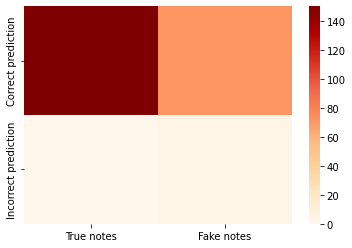

In [192]:
matrice=pd.DataFrame({'True notes':np.array([correct_T,incorrect_T]),'Fake notes':np.array([correct_F,incorrect_F])},index=['Correct prediction','Incorrect prediction'])
sns.heatmap(matrice,cmap="OrRd")
plt.show()

#### 3D graph with lenght, margin_low and margin_up 

In [193]:
from mpl_toolkits.mplot3d import Axes3D

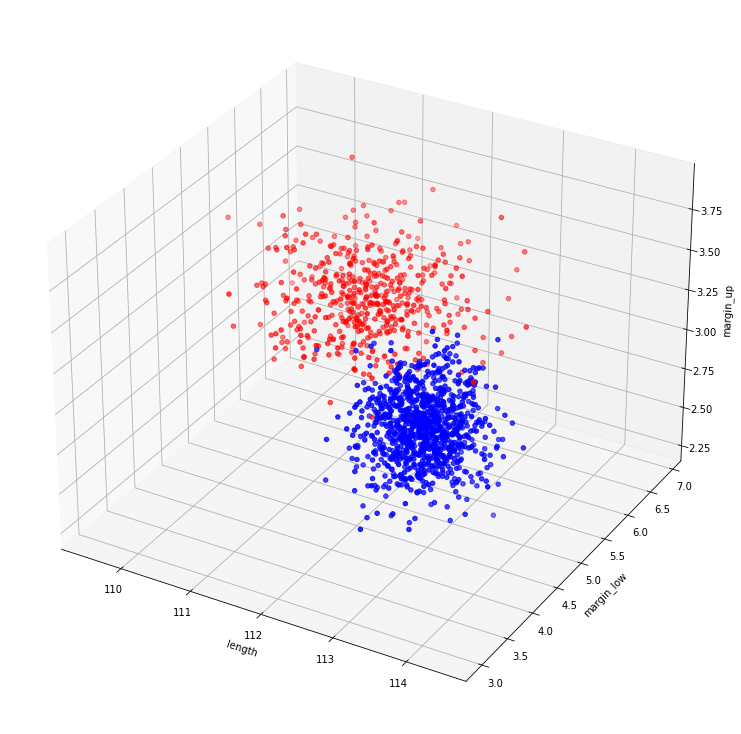

In [194]:
fig=plt.figure(figsize=(14,10))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

x = notes['length']
y = notes['margin_low']
z = notes['margin_up']
colors={False:"red",True:"blue"}

ax.scatter(x, y, z, c=notes['is_genuine'].map(colors), marker='o')
ax.set_xlabel('length')
ax.set_ylabel('margin_low')
ax.set_zlabel('margin_up')

plt.show()

#### Prediction out of another file

In [195]:
notes_prod=pd.read_csv('billets_production.csv',sep=",")
notes_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [196]:
#splitting the index column
X_prod=notes_prod.drop(columns="id")
id_prod=notes_prod.id

In [197]:
pred_prod=model_log.predict(X_prod)

In [198]:
for i in range(5):
    print("The note with the ID: {} is {} ".format(id_prod[i],pred_prod[i]))

The note with the ID: A_1 is False 
The note with the ID: A_2 is False 
The note with the ID: A_3 is False 
The note with the ID: A_4 is True 
The note with the ID: A_5 is True 


### Kmeans prediction

In [199]:
from sklearn.cluster import KMeans

#### Instanciation of kmean object for 2 groups

In [200]:
kmean=KMeans(n_clusters=2)
kmean.fit(x_train)

KMeans(n_clusters=2)

#### Addidng groups to the training matrix

In [201]:
train_notes=pd.DataFrame(x_train)
train_notes['group']=kmean.labels_
train_notes['Is_genuine']=y_train

In [202]:
train_notes.head(10)

,diagonal,height_left,height_right,margin_low,margin_up,length,group,Is_genuine
205,172.16,104.04,104.02,4.06,3.08,113.02,0,True
755,171.62,104.12,103.81,4.38,3.13,112.64,0,True
162,172.09,104.05,104.26,4.10,2.95,113.68,0,True
1287,171.31,103.95,104.07,5.14,3.41,112.44,1,False
1145,171.79,103.81,103.97,5.86,3.20,111.04,1,False
1360,171.98,104.44,104.26,5.75,3.20,110.93,1,False
1431,172.52,104.11,104.35,5.30,3.31,111.55,1,False
926,172.15,103.98,103.89,4.21,3.08,113.61,0,True
132,171.84,103.77,103.98,4.61,2.99,113.59,0,True
687,172.02,104.23,104.26,4.92,2.89,113.49,0,True


#### From this kmean algortithm, the groups 0 would be for the "True" notes and group 1 for tha "False" notes

### Let's create a function to predict the notes based on the their distance from the centroids

In [206]:
def pred_notes_kmean (kmean,data):
    centroid_true=kmean.cluster_centers_[0]
    centroid_false=kmean.cluster_centers_[1]
    prediction=list()
    #calcul of the distance of each notes from both centroids.
    for row in data.itertuples(): 
        #with True note centroid
        d1=(row[1]-centroid_true[0])**2
        d2=(row[2]-centroid_true[1])**2
        d3=(row[3]-centroid_true[2])**2
        d4=(row[4]-centroid_true[3])**2
        d5=(row[5]-centroid_true[4])**2
        d6=(row[6]-centroid_true[5])**2
        
        d_true=d1+d2+d3+d4+d5+d6
        
        #with False note centroid
        d1=(row[1]-centroid_false[0])**2
        d2=(row[2]-centroid_false[1])**2
        d3=(row[3]-centroid_false[2])**2
        d4=(row[4]-centroid_false[3])**2
        d5=(row[5]-centroid_false[4])**2
        d6=(row[6]-centroid_false[5])**2
        
        d_false=d1+d2+d3+d4+d5+d6
        
        #Result
        if d_true<=d_false:
            prediction.append(True)
        else:
            prediction.append(False)
    
    return prediction

#### Let see now with our x_test matrix

#### Let's compare with our y_test values

In [208]:
y_pred=pred_notes_kmean(kmean,x_test)
data={'Test values)':y_test,'predicted values':y_pred}
matrice_true_false_K=pd.DataFrame(data)
matrice_true_false_K

,Test values),predicted values
405,True,True
27,True,True
1151,False,False
1452,False,True
728,True,False
...,...,...
1332,False,False
344,True,True
797,True,True
1229,False,False


#### Model evaluation

In [209]:
correct_T,correct_F,incorrect_T,incorrect_F,score_=evaluate_model(y_pred,y_test)
print("Correct predictions of true notes:", correct_T)
print("Correct predictions of false notes:", correct_F)
print("Incorrect predictions of true notes:", incorrect_T)
print("Incorrect predictions of false notes:", incorrect_F)
print("Percentage of correct predictions:", round(score_,2), "%")

Correct predictions of true notes: 151
Correct predictions of false notes: 68
Incorrect predictions of true notes: 0
Incorrect predictions of false notes: 6
Percentage of correct predictions: 97.33 %


#### Heat map

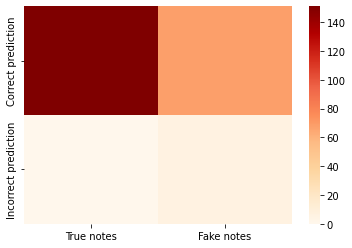

In [210]:
matrice=pd.DataFrame({'True notes':np.array([correct_T,incorrect_T]),'Fake notes':np.array([correct_F,incorrect_F])},index=['Correct prediction','Incorrect prediction'])
sns.heatmap(matrice,cmap="OrRd")
plt.show()

#### Prediction out of another file with this kmean methode

In [211]:
notes_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [212]:
y_pred_prod=pred_notes_kmean(kmean,X_prod)

In [213]:
for i in range(5):
    print("Le billet avec l'id: {} est {} ".format(id_prod[i],y_pred_prod[i]))

Le billet avec l'id: A_1 est False 
Le billet avec l'id: A_2 est False 
Le billet avec l'id: A_3 est False 
Le billet avec l'id: A_4 est True 
Le billet avec l'id: A_5 est True 


### Graphique representation with 'length' and 'margin_low'

In [214]:
test_notes=pd.DataFrame(x_test)
test_notes['groups']=y_pred
test_notes['is_genuine']=y_test

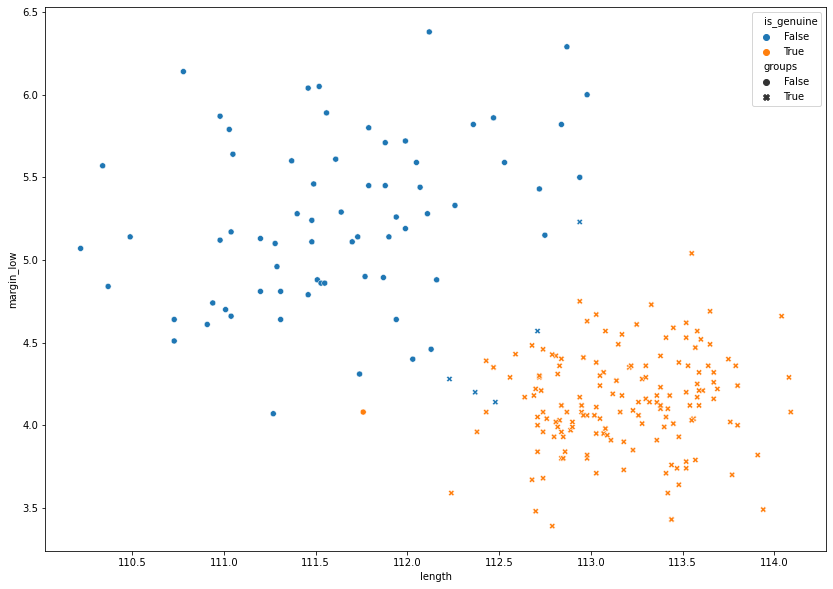

In [215]:
fig=plt.figure(figsize=(14,10))
sns.scatterplot(data=test_notes, x="length", y="margin_low", hue="is_genuine", style="groups")

plt.show()